# Risk to Heart Attack
## Author : HoomanKaseban ( Mr.Programmer)
### In this project, we try to predict the risk of heart attack

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as prp
import matplotlib.pyplot as mpl
%matplotlib inline

## Read the Csv File

### This File Contains the information of  patients 
<ul>
    <li><b>Age :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Patient's age</i>
    </li>
    <li><b>Sex :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Patient's gender</i>
    </li>
    <li><b>cp :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Type of chest pain</i>
        <i style="color:blue;font-family:arial;font-weight:bold;font-size:9pt">
            <br >
            <q style="color:black;font-weight:bold">1</q>direct heart pain
            <br >
            <q style="color:black;font-weight:bold">2</q>Indirect pain that causes pain in the heart
            <br >
            <q style="color:black;font-weight:bold">3</q>non-cardiac pain
            <br >
            <q style="color:black;font-weight:bold">4</q>No symptoms</i>
    </li>  
    <li><b>trtbps :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Resting blood pressure</i>
    </li>    
    <li><b>chol :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Cholesterol</i>
    </li>
    <li><b>fbs :</b>
        <i style="color:red;font-family:arial;font-weight:bold">High fasting blood sugar - diabetes</i>
        <i style="color:blue;font-family:timesnewroman;font-weight:bold">1,mean"Yes,Has it!". 0,mean's "No,Hasn't it!"</i>
    </li>
    <li><b>rest_ecg :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Type of chest pain</i>
        <i style="color:blue;font-family:arial;font-weight:bold;font-size:9pt">
            <br >
            <q style="color:black;font-weight:bold">0</q>normal
            <br >
            <q style="color:black;font-weight:bold">1</q>the ST segment of the ECG is abnormal
            <br >
            <q style="color:black;font-weight:bold">2</q>Probably or definitely the left ventricle is large</i>
    </li>
    <li><b>thalach :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Maximum heart rate</i>
    </li>
    <li><b>exng :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Does the pain start with a specific activity?</i>
        <i style="color:blue;font-family:timesnewroman;font-weight:bold">1,mean"Yes". 0,mean's "No"</i>
    </li>
    <li><b>oldpeak :</b>
        <i style="color:red;font-family:arial;font-weight:bold">ST depression induced by exercise relative to rest</i>
    </li>
    <li><b>slp :</b>
        <i style="color:red;font-family:arial;font-weight:bold">the slope of the peak exercise ST segment</i>
    </li>
    <li><b>caa :</b>
        <i style="color:red;font-family:arial;font-weight:bold">A value from 0 to 3</i>
    </li>
    <li><b>thall :</b>
        <i style="color:red;font-family:arial;font-weight:bold">A blood disorder called thalassemia</i>
        <i style="color:blue;font-family:arial;font-weight:bold;font-size:9pt">
            <br >
            <q style="color:black;font-weight:bold">0</q>will be clear of dataset
            <br >
            <q style="color:black;font-weight:bold">1</q>fixed defect (no blood flow in some part of the heart)
            <br >
            <q style="color:black;font-weight:bold">2</q>normal blood flow
            <br >
            <q style="color:black;font-weight:bold">3</q>reversible defect (a blood flow is observed but it is not normal)</i>
    </li>
    <li><b>output :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Risk to HeartAttack</i>
        <i style="color:blue;font-family:timesnewroman;font-weight:bold">1,mean"Yes,High Risk!". 0,mean's "No,Low Risk!"</i>
    </li>
</ul>

In [20]:
#make data frame from csv file
df=pd.read_csv('heart.csv')
#show data frame
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Get Some Info about Data

In [22]:
#find the number of cases
df.shape

(303, 14)

In [23]:
#get some info about data types
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

## Data Cleaning

In [24]:
#Deleting the Rows(cases) have NAN columns
df.dropna(inplace=True)

In [25]:
#get number of rows(cases) after data cleaning
df.shape

(303, 14)

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Convert PandasDF's X and Y to Numpy Array for Using in Sklearn

In [28]:
#convert x data
#we choose all data as 'x' except output
x=np.asanyarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]).astype(float)
#show array
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [29]:
#convert y data
#we choose output as 'y'
y=np.asanyarray(df['output']).astype(float)
#show array
y[:5]

array([1., 1., 1., 1., 1.])

## Normalaizing the X Data

In [30]:
#use standard scaler
scaler=prp.StandardScaler().fit(x)
x=scaler.transform(x)
#show normalized array
x[:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
         1.09, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
         2.12, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
         0.31,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.21,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.38,  0.98, -0.71, -0.51]])

# Create Train-Test Spliter

In [32]:
#use model selection 
from sklearn.model_selection import train_test_split as tts
#splitting
x_train,x_test,y_train,y_test=tts(x,y,train_size=.75,random_state=6)
#print number of cases(arrays size)
print(x_train.shape,x_test.shape)

(227, 13) (76, 13)


# Machine Learning
# With LogisticRegression
## Modeling

In [33]:
from sklearn.linear_model import LogisticRegression as lg
#After several attempts with different values, I came to the conclusion that the best c is 0.1
#The suitable solution for this project is Liblinear
model=lg(C=0.01,solver='liblinear')
#modeling
model.fit(x_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

## Predict Y and Y's probabilty

In [44]:
#predict 'y' from 'test data'
y_hat=model.predict(x_test)
#predict exact 'predicted y' from 'test data'
y_hat_prob=model.predict_proba(x_test)
#print general predict y vs orgingal y
print('general predicted y :')
print(y_hat[:5])
print('orginal y :')
print(y_test[:5])
#print exact predicted y
print('the exact number of predicted y')
print(y_hat_prob[:5])

general predicted y :
[0. 1. 1. 0. 0.]
orginal y :
[0. 1. 0. 0. 0.]
the exact number of predicted y
[[0.5  0.5 ]
 [0.42 0.58]
 [0.5  0.5 ]
 [0.76 0.24]
 [0.55 0.45]]


## Check The Accuracy Of Model

In [17]:
#use f1-score,jaccard-index,log-loss for accuracy
from sklearn.metrics import f1_score,jaccard_score,log_loss
f1=f1_score(y_test,y_hat)
jaccard=jaccard_score(y_test,y_hat)
logloss=log_loss(y_test,y_hat_prob)
print('F1_Score is : %f \nJaccard_Index is : %f\nLog_Loss is :%f'%(f1,jaccard,logloss))

F1_Score is : 0.847059 
Jaccard_Index is : 0.734694
Log_Loss is :0.475047


# Describe
## As we can see, the score of X and Y is almost high and the log loss is almost low, and as a result, our model has a high accuracy

# 
# Create Founction of ConfusionMatrix Plot

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('True label')
    mpl.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[36  4]
 [ 9 27]]


## Create ConfusionMatrix and Call the PlotCM Founction

Confusion matrix, without normalization
[[36  4]
 [ 9 27]]


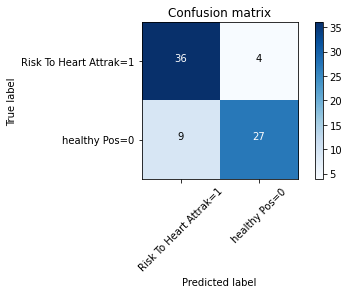

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
mpl.figure
plot_confusion_matrix(cnf_matrix, classes=['Risk To Heart Attrak=1','healthy Pos=0'],normalize= False,  title='Confusion matrix')

# Describe
## The confusion matrix also confirms the high accuracy of our model, like the meters that were used above
<ul>
<li>The worst case in this model is that someone is at risk of having a heart attack, but the System recognizes that he is not in danger 'False-Negative'</li>
<li>According to the table, it can be seen that only 4 cases of this happened, which is a good statistic compared to the test data we had</li>
<li>In another case where the System makes a mistake, nothing bad will happen to the person. In this case, the person is not at risk of infection, but the system detects the risk of infection, and finally the person does a re-check and no harm will come to him, unlike the first case.</li>
<li>In the other two cases, which include a large part of the test, the System worked correctly</li>
</ul>

## Thank you for your support
## Author : HoomanKaseban
<a href='https://www.kaggle.com' target='_blank'>Dataset Source:kaggle</a>
### you can contact me through gmail,instagram,linkedin and github
#### Gmail:www.hoomankaseban@gmail.com
<ul>
<li><a href='https://www.instagram.com/hooman_kaseban' target='_blank'>my Instagram</a></li>
<li><a href='https://www.linkedin.com/in/hoomankaseban/' target='_blank'>my LinkedIn</a></li>
<li><a href='https://github.com/hoomankaseban' target='_blank'>my GitHub</a></li>
</ul>

#### Credit:All credits of this code are for Hooman Kaseban and are free for public use.
# The END